# Basic Data mining technique Data mining Practice and Theory Group 156

In this file is the data exploration of the first assignment of the Datamining course. <br>
This file was created by group 156 consisting of: <br>
J. Olsen (2739132), <br>
T. Nauta (2637365), <br>
W. Kuppers (2637653)
    

### Importing the required packages

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import re
from datetime import datetime
import math

## Data parsing and visulisation

In this part we import the data into the notebook and visulize its content.

### parsing

In [2]:
df = pd.read_csv('../Data/ODI_2022.csv',";")
df_plots = df.copy()

C:\Users\WGN\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
df.head()

,Tijdstempel,What programme are you in?,Have you taken a course on machine learning?,Have you taken a course on information retrieval?,Have you taken a course on statistics?,Have you taken a course on databases?,What is your gender?,Chocolate makes you.....,When is your birthday (date)?,Number of neighbors sitting around you?,Did you stand up?,What is your stress level (0-100)?,"You can get 100 euros if you win a local DM competition, or we don’t hold any competitions and I give everyone some money (not the same amount!). How much do you think you would deserve then?",Give a random number,Time you went to be Yesterday,What makes a good day for you (1)?,What makes a good day for you (2)?
0,4-5-2022 12:12:07,artificial intelligence,yes,0,mu,nee,female,neither,02.05.1998,0,no,0,5,888,23:00,coffee,sun
1,4-5-2022 12:12:07,big data,yes,0,mu,nee,male,fat,29-02-2000,0,yes,200,1,12,32,7777,8964
2,4-5-2022 12:12:09,Computational Science,yes,1,mu,ja,male,fat,29-06-1998,1,no,0,100,9,x,0,0
3,4-5-2022 12:12:09,Bioinformatics and Systems Biology,yes,0,unknown,nee,male,neither,11/05/97,0,no,20,100,31,14:00,good food,no stress
4,4-5-2022 12:12:15,AI,yes,1,mu,ja,male,fat,03-10-1997,0,no,2,100,86,07:20,Sunshine,Good Food


In [5]:
df.columns

Index(['Tijdstempel', 'What programme are you in?',
       'Have you taken a course on machine learning?',
       'Have you taken a course on information retrieval?',
       'Have you taken a course on statistics?',
       'Have you taken a course on databases?', 'What is your gender?',
       'Chocolate makes you.....', 'When is your birthday (date)?',
       'Number of neighbors sitting around you?', 'Did you stand up?',
       'What is your stress level (0-100)?',
       'You can get 100 euros if you win a local DM competition, or we don’t hold any competitions and I give everyone some money (not the same amount!). How much do you think you would deserve then? ',
       'Give a random number', 'Time you went to be Yesterday',
       'What makes a good day for you (1)?',
       'What makes a good day for you (2)?'],
      dtype='object')

In [7]:
df.describe()

,Tijdstempel,What programme are you in?,Have you taken a course on machine learning?,Have you taken a course on information retrieval?,Have you taken a course on statistics?,Have you taken a course on databases?,What is your gender?,Chocolate makes you.....,When is your birthday (date)?,Number of neighbors sitting around you?,Did you stand up?,What is your stress level (0-100)?,"You can get 100 euros if you win a local DM competition, or we don’t hold any competitions and I give everyone some money (not the same amount!). How much do you think you would deserve then?",Give a random number,Time you went to be Yesterday,What makes a good day for you (1)?,What makes a good day for you (2)?
count,304,304,304,304,304,304,304,304,304,304,304,304,303,304,302,304,304
unique,165,123,3,3,3,3,5,5,295,30,3,77,109,142,177,201,235
top,4-5-2022 12:16:06,AI,yes,0,mu,ja,male,neither,08-05-1998,0,no,10,100,7,23:00,Sun,Food
freq,9,39,185,202,243,158,183,105,3,126,236,22,50,19,21,14,11


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 304 entries, 0 to 303
Data columns (total 17 columns):
 #   Column                                                                                                                                                                                            Non-Null Count  Dtype 
---  ------                                                                                                                                                                                            --------------  ----- 
 0   Tijdstempel                                                                                                                                                                                       304 non-null    object
 1   What programme are you in?                                                                                                                                                                        304 non-null    object
 2   Ha

### preprocessing

In [8]:
program = df.iloc[:,1].copy()

for i, line in enumerate(program):
    print(line)
    line = line.upper()
    result = line
    result = re.sub(r".*AI.*", "AI", result)
    result = re.sub(r".*ARTIFICIAL INTELLIGENCE.*", "AI", result)
    result = re.sub(r".*COMPUTATIONAL SCIENCE.*", "CS", result)
    result = re.sub(r".*BI.*", "BI", result)
    result = re.sub(r".*BIO.*INFORMATICS.*", "BI", result)
    result = re.sub(r".*ECONOMETRICS.*", "ECO", result)
    result = re.sub(r".*COMPU.*", "CS", result)
    result = re.sub(r".*BUSINESS.*", "BA", result)
    result = re.sub(r".*DATA SCIENCE.*", "DS", result)
    result = re.sub(r".*DATA.*", "DM", result)
    result = re.sub(r".*EOR.*", "E&OR", result)
    result = re.sub(r".*QUANTITATIVE.*", "QRM", result)
    result = re.sub(r".*QRM.*", "QRM", result)
    result = re.sub(r".*FIN.*", "FT", result)
    
    if len(result) > 2:
        result = "OTHER"
    program[i,1] = result
df_plots.iloc[:,1] = program
    

artificial intelligence
AI
Computational  Science
Bioinformatics and Systems Biology
AI
Artificial Intelligence
Artificial Intelligence 
M Artificial Intelligence
FinTech
Artificial Intelligence
Artificial Intelligence MsC
Business analytics
ai
programme?
Masters in Artificial Intelligence
Msc. Information Studies Data Science Track UVA 
Artificial Intelligence
Artificial Intelligence
AI
Econometrics and Operational Research
Finance and Technology
Computer science
AI
AI
Bioinformatics and Systems Biology
Business Analytics
Computational Science
Computational Science
chrome
Computational Science
MSc Mathematics
Artificial Intelligence
Econometrics
AI for health
AI
Data Mining techniques
computer scienece
Artificial Intelligence
Msc AI @ UvA
Econometrics & Operations Research
Master Artificial Intelligence
Computational Science
Artificial intelligence 
Artificial Intelligence 
Data Science
MSc Econometrics & Operations Research
Computational science
AI
Bioinformatics and Systems Biology


In [8]:
birthdays = df.iloc[:,8].copy()
form = re.compile(r"^[0-9]{2}.\b(0[1-9]|1[0-2])\b.[0-2][0,9][0,3-9]{2}$")

new_birthdays = []
for i, birthday in enumerate(birthdays):
    birthday = re.sub("-", ".", birthday)
    birthday = re.sub("/", ".", birthday)
    birthday = re.sub("\\'", ".", birthday)
    birthday = re.sub(r"\\.([0-9])\\.", r".0\1.", birthday)
    birthday = re.sub(r"\\.([3-9]{2})$", r".19\1", birthday)
       
    new_birthdays.append(birthday)
        
dates_dt = []
for i, date in enumerate(new_birthdays):
    try:
        dates_dt.append(str(datetime.strptime(date, "%d.%m.%Y").year))
    except:
        dates_dt.append("Unknown")
        
df_plots.iloc[:,8] = dates_dt

In [9]:
neighbours = df.iloc[:,9].copy()

for i, neighbour in enumerate(neighbours):
    if neighbour.isnumeric():
        if int(neighbour) > 10:
            neighbours[i] = "> 10"
    else:
        neighbours[i] = "Unknown"
df_plots.iloc[:,9] = neighbours

In [10]:
stresses = df.iloc[:,11].copy()

for i, stress in enumerate(stresses):
    if not stress.isnumeric():
        stresses[i] = "Unknown"
    else:
        stress = int(stress)
        if not(stress in range(0,100)):
            stresses[i] = "Outside range"
        elif stress <= 10:
            stresses[i] = "0-10"
        elif stress <= 20:
            stresses[i] = "11-10"
        elif stress <= 30:
            stresses[i] = "21-30"
        elif stress <= 40:
            stresses[i] = "31-40"
        elif stress <= 50:
            stresses[i] = "41-50"
        elif stress <= 60:
            stresses[i] = "51-60"
        elif stress <= 70:
            stresses[i] = "61-70"
        elif stress <= 80:
            stresses[i] = "71-80"
        elif stress <= 90:
            stresses[i] = "81-90"
        elif stress <= 100:
            stresses[i] = "91-100"
df_plots.iloc[:,11] = stresses

In [11]:
monies = df.iloc[:,12].copy()

new_monies = []
for money in monies:
    if str(money) == "nan":
        new_monies.append("Unknown")
    else:
        money = re.sub(r"\D*1[00]*\s*/[\D\d]*",r"0.16",money)
        money = re.sub(r"equal",r"0.16",money)
        
        money = re.sub(r"€",r"",money)
        money = re.sub(r"eur[o]*[s]*",r" ",money)
        money = re.sub(r"cent[s]*",r" ",money)
        
        money = re.sub(r"at least*",r" ",money)
        money = re.sub(r"I deserve everything*",r"100",money)
        money = re.sub(r"You don’t owe me anything",r"0",money)
        money = re.sub(r"   to buy previously mentioned chocolate",r" ",money)
        money = re.sub(r"100   divided over 600 students. 0.6",r"0.16",money)
        money = re.sub(r"1 million",r"1000000",money)
        
        money = re.sub(r",",r".",money)
        
        if money.isnumeric():
            money = float(money)
            if not(money in range(0,100)):
                new_monies.append("Outside Range")
            elif money <= 1:
                new_monies.append("0-1")
            elif money <= 5:
                new_monies.append("1-5")
            elif money <= 10:
                new_monies.append("6-10")
            elif money <= 20:
                new_monies.append("11-20")
            elif money <= 30:
                new_monies.append("21-30")
            elif money <= 40:
                new_monies.append("31-40")
            elif money <= 50:
                new_monies.append("41-50")
            elif money <= 60:
                new_monies.append("51-60")
            elif money <= 70:
                new_monies.append("61-70")
            elif money <= 80:
                new_monies.append("71-80")
            elif money <= 90:
                new_monies.append("81-90")
            elif money <= 100:
                new_monies.append("91-100")
        else:
            new_monies.append("Unknown")
df_plots.iloc[:,12] = new_monies

In [12]:
random_numbers = df.iloc[:,13].copy()

new_random_numbers = []
for number in random_numbers:
    if number.isnumeric():
        number = float(number)
        if number < 0:
            new_random_numbers.append("< 0")
        if number <= 10:
            new_random_numbers.append("0-10")
        elif number <= 100:
            new_random_numbers.append("10-100")
        elif number <= 1000:
            new_random_numbers.append("100-1000")
        elif number <= 10000:
            new_random_numbers.append("1000-10.000")
        elif number <= 100000:
            new_random_numbers.append("10.000-10.0000")
        elif number > 100000:
            new_random_numbers.append("> 100.000")
    else:
        new_random_numbers.append("Unknown")
        
df_plots.iloc[:,13] = new_random_numbers

In [13]:
bedtime = df.iloc[:,14].copy()
new_bedtime = []
for time in bedtime:
    try:
        time = re.sub(r"[Aa][Mm]",r" ",time)
        time = re.sub(r"[Pp][Mm]",r" ",time)
        time = re.sub(r"o'\s*clock",r" ",time)
        time = re.sub(r"h",r" ",time)
        time = re.sub(r"^([0-9]{2}):([0-9]{2}):[0-9]{2}$",r"\1:\2",time)

        time = re.sub(r"\.",r":",time)
        time = re.sub(r"^([0-9]{2})$",r"\1:00",time)
        time = re.sub(r" hours$",r":00",time)
        time = re.sub(r"midnight",r"12:00",time)
        time = re.sub(r"noon",r"12:00",time)
        time = re.sub(r"([0-9]{2})([0-9]{2})",r"\1:\2",time)
        
        time = re.sub(r"^([0-9]:)",r"0\1",time)
        time = re.sub(r"^([0-9])\s*$",r"0\1:00",time)
        time = re.sub(r"^([0-9]{2})\s*$",r"\1:00",time)
        
        bed_time = datetime.strptime(time, "%H:%M")
        new_bedtime.append(bed_time.hour)
    except:
        new_bedtime.append("Unknown")
df_plots.iloc[:,14] = new_bedtime

### visualisation

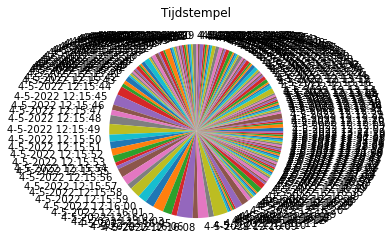

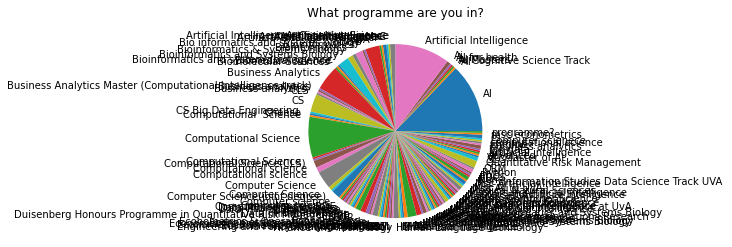

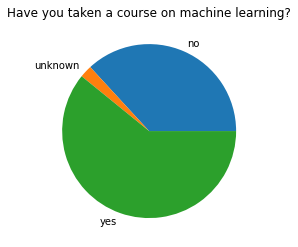

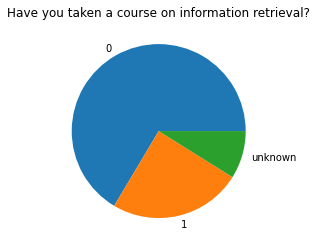

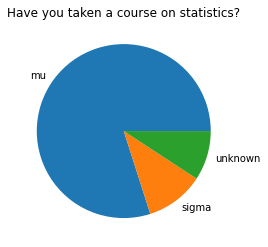

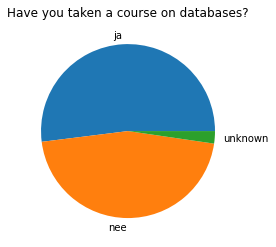

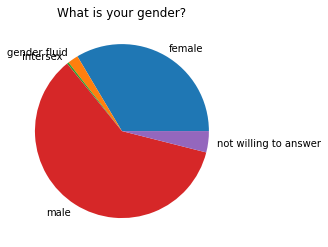

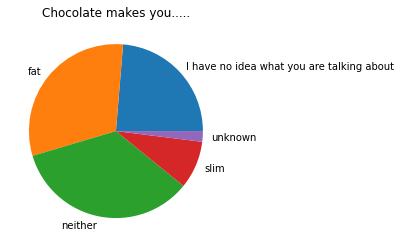

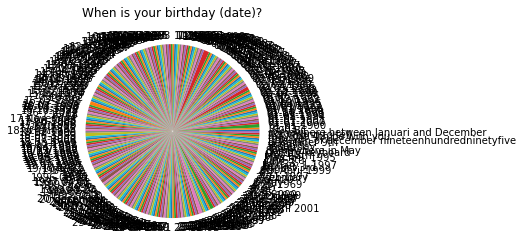

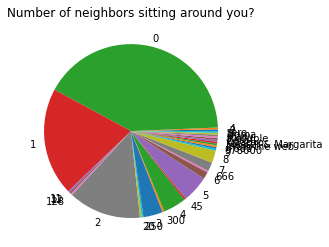

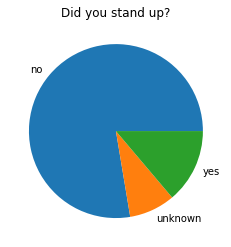

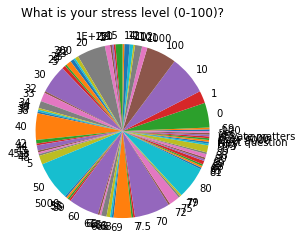

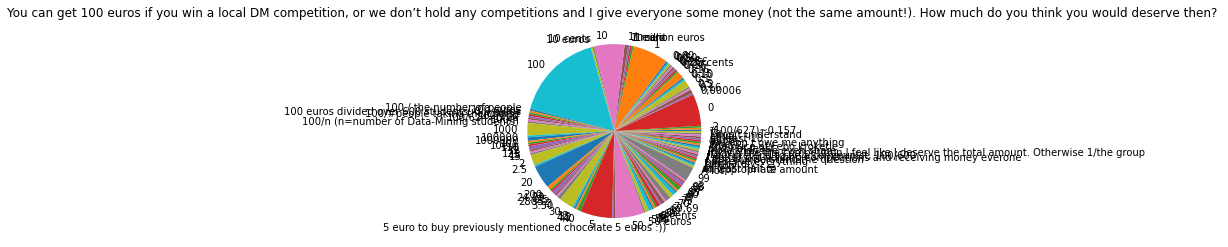

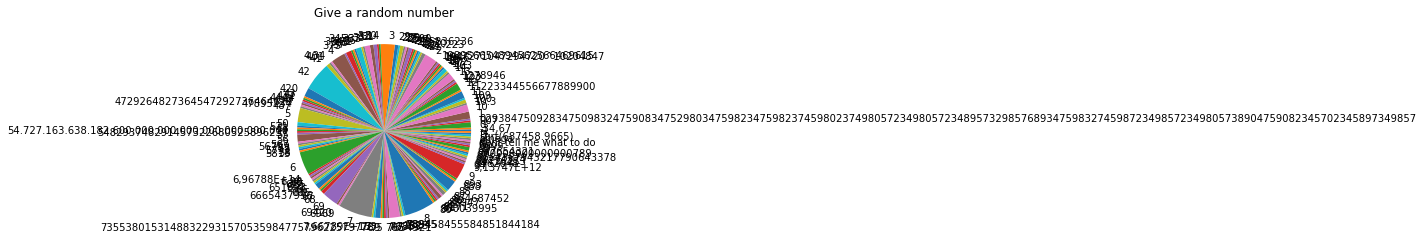

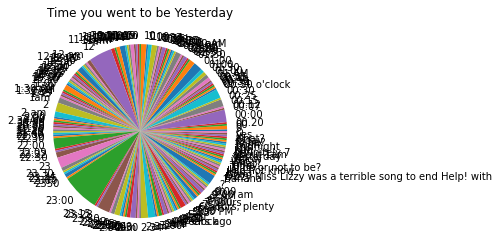

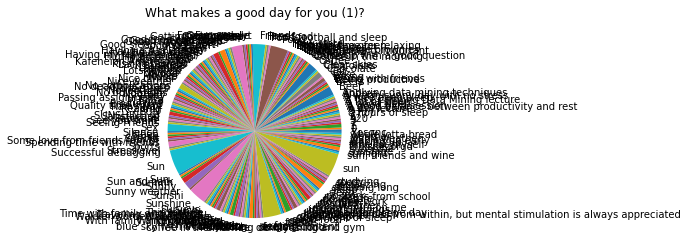

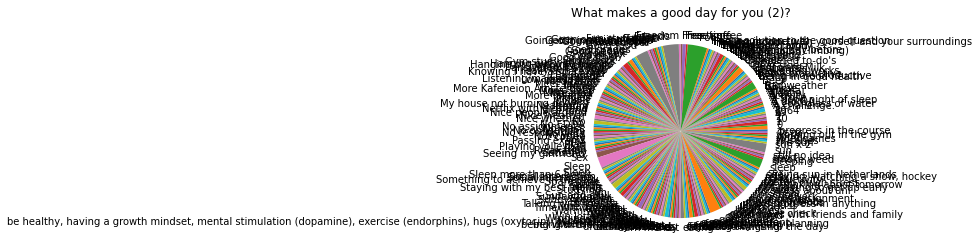

In [4]:
for column in df_plots.columns:
    Group = df_plots.groupby(column).size()
    
    Group_pie = plt.pie(Group.tolist(), labels = list(Group.index))
    #Group_bar = plt.bar(list(Group.index),Group.tolist())
    
    plt.title(column)
    plt.show()


In [ ]:
groups = df_plots.groupby()

What programme are you in?
AI                            39
AI                             1
AI Cognitive Science Track     1
AI Masters                     1
AI for health                  1
                              ..
computational science          1
computer scienece              1
cs                             2
msc econometrics               1
programme?                     1
Length: 123, dtype: int64


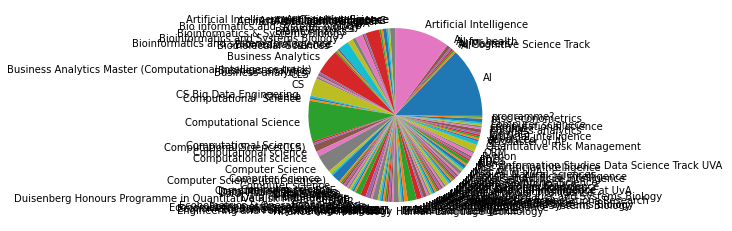

In [15]:
Prog = df.groupby("What programme are you in?").size()
print(Prog)
Prog_pie = plt.pie(Prog.tolist(), labels = list(Prog.index))

Have you taken a course on machine learning?

Have you taken a course on machine learning?
no         112
unknown      7
yes        185
dtype: int64


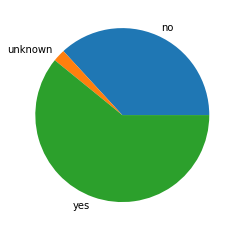

In [16]:
ML = df.groupby("Have you taken a course on machine learning?").size()
print(ML)
ML_pie = plt.pie(ML.tolist(), labels = list(ML.index))

Have you taken a course on information retrieval?
0          202
1           75
unknown     27
dtype: int64


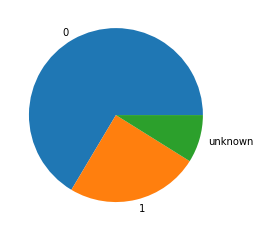

In [17]:
IR = df.groupby("Have you taken a course on information retrieval?").size()
print(IR)
IR_pie = plt.pie(IR.tolist(), labels = list(IR.index))